## Софья Скобелева
## Контрольная на тему классификации

Данные конкретно о клиентах банка:

1. - age: возраст
2. - job:тип работы
3. - marital: семейный статус
4. - education: уровень образования
5. - default: имеет ли кредит в просрочке
6. - housing: имеет ли клиент жилищный кредит
7. - loan: имеет ли клиент персональный кредит
8. - balance: баланс клиента

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

8. - contact: тип контакта с клиентом
9. - month:месяц, в котором был последний контакт
10. - day: день, в который был последний контакт
11. - duration: длительность контакта в секундах

Прочие признаки:

12. - campaign: количество контактов с этим клиентом в течение этой кампании
13. - pdays: количество пропущенных дней с момента последней маркетинговой кампании до контакта в этой
14. - previous: количество контактов до этой кампании
15. - poutcome: результат прошлой маркетинговой кампании

И, разумеется, наша целевая переменная __deposit__, которая определяет, согласится ли клиент открыть депозит в нашем банке. Именно ее мы будем пытаться предсказать в данном кейсе.



# Первичная обработка данных (2 балла)

Импортируем модули, которые нам понадобятся:

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics

## Задание 1 (0.5 балла)

Откройте предложенные данные. Начнем с того, что оценим, насколько они готовы к дальнейшему анализу. В первую очередь давайте выясним, есть ли в данных пропущенные значения (пустые, незаполненные ячейки)?

In [156]:
data = pd.read_csv('bank_fin.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


In [157]:
data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

В данных есть пропуски в столбце `balance`

## Задание 2 (0.75 балла)

Мы нашли пропущенные значения, и хотелось бы теперь их обработать. Однако мы не можем этого сделать, так как не все данные у нас находятся в корректном виде. Обратите внимание на признак balance. В данных содержится лишняя запятая и знак доллара. По этой причине этот признак не считывается как число. Обработайте данные этого признака так, чтобы он был преобразован в тип float. 
Подсказка: Вам понадобится метод str.replace.

Пример: `df['balance'] = df['balance'].str.replace(',00', '')`

In [158]:
data['balance'] = data['balance'].apply(lambda x: float(str(x).replace(" ", "").replace(",", ".").replace("$", "")))
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [160]:
data['balance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: balance
Non-Null Count  Dtype  
--------------  -----  
11137 non-null  float64
dtypes: float64(1)
memory usage: 87.3 KB


##  Задание 3. (0.75 балла)

Обработайте пропуски с помощью их замены. Выберите сами, чем вы замените пропуски. Поясните свой выбор.

Посмотрим на распределение единственного признака с пропущенными значениями (`balance`) 

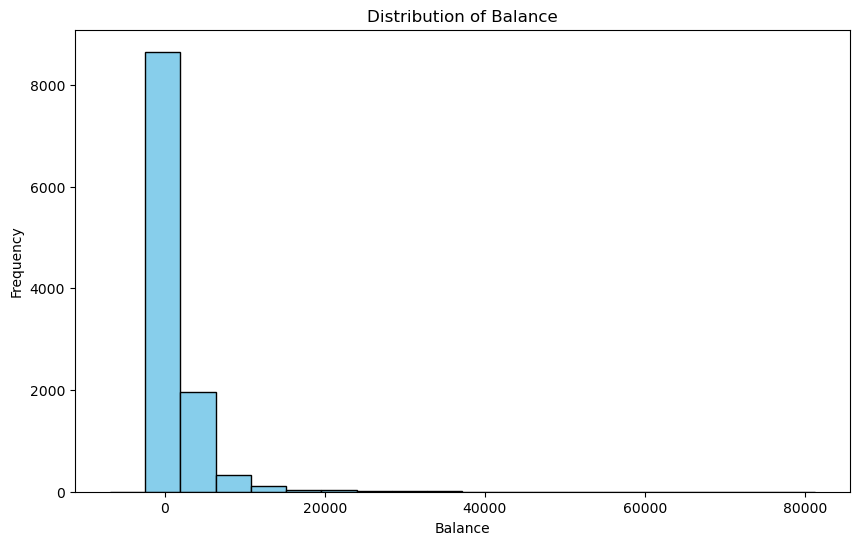

In [161]:
plt.figure(figsize=(10, 6))
plt.hist(data['balance'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

Заменим пропуски медианой:

In [162]:
data['balance'] = data['balance'].fillna(data['balance'].median())
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Разведочный анализ данных (EDA) (2.5 балла)

##  Задание 3. (1 балл)

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех числовых столбцов. Напишите интерпретацию для трех любых признаков.(Для каждого 3-4 предложения)

In [163]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1526.936033,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3224.829691,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1699.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


`age`: Средний возраст клиентов банка - около 41 года, то есть в выборке преобладают клиенты среднего возраста. Минимальный возраст - 18 лет, максимальный - 95 лет, диапазон возрастов в выборке широкий. 25% клиентов в выборке имеют возраст до 32 лет, 50% - до 39 лет, 75% - до 49 лет.  

`day`: В среднем последний контакт с клиентами был около 16 дней назад. Минимальное количество дней, когда был последний контакт - 1 день, максимальное - 31 день. В 25% случаев последний контакт был менее чем 8 дней назад, в 50% - менее чем 15 дней назад, в 75% - менее чем 22 дня назад.    

`duration`: В среднем контакт с клиентом длится около 372 секунд. Минимальная продолжительность контакта - 2 секунды, максимальная - 3881 секунд. В 25% случаев контакт длился менее чем 138 секуны, в 50% - менее чем 255 секунды, в 75% - менее чем 496 секунды.  

##  Задание 4. (0.5 балла)

Давайте изучим, какое у нас распределение целевой переменной: есть ли несбалансированность классов? Для того, чтобы это сделать, вычислите частоты для открывших депозит и для тех, кто его не открыл. Напишите интерпретацию (2-3 предложения)

In [62]:
deposit_counts = data['deposit'].value_counts()
deposit_counts

no     5873
yes    5289
Name: deposit, dtype: int64

In [169]:
print(f'Разница между клиентами, не открывавшими депозит, и клиентами, открывшими депозит: {5873 - 5289}')

Разница между клиентами, не открывавшими депозит, и клиентами, открывшими депозит: 584


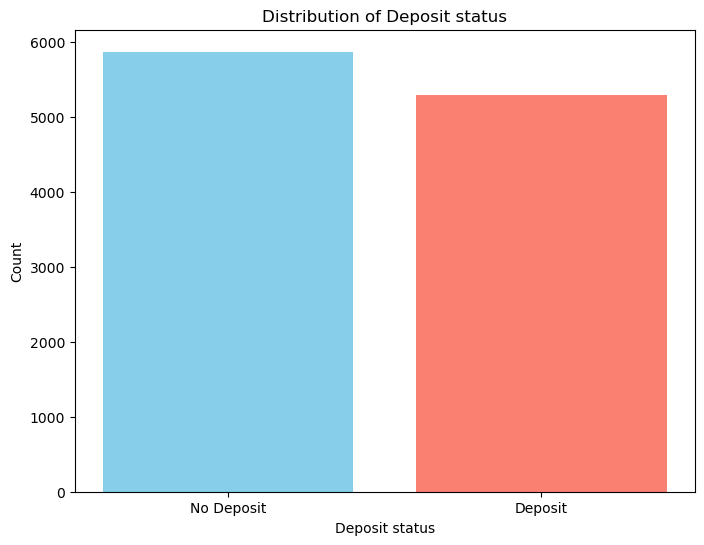

In [64]:
plt.figure(figsize=(8, 6))
plt.bar(deposit_counts.index, deposit_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Deposit status')
plt.ylabel('Count')
plt.title('Distribution of Deposit status')
plt.xticks([0, 1], ['No Deposit', 'Deposit'])
plt.show()

Клиентов, не открывавших депозит, больше на 584, чем клиентов, открывших депозит. Модель может быть склонна к предсказанию класса клиентов, который встречается чаще (клиенты, у которых нет депозита), но, в целом, сильной несбалансированности классов нет

##  Задание 5. (0.5 балла)

Какая средняя длительность последнего контакта была для контактов в июне?

In [172]:
june_contacts = data[data['month'] == 'jun']
print(f"Средняя длительность последнего контакта в июне: {june_contacts['duration'].mean()} секунд")

Средняя длительность последнего контакта в июне: 364.7422258592471 секунд


##  Задание 6. (0.5 балла)

Какой минимальный баланс у женатых людей, открывших депозит?

In [173]:
married_deposit = data[(data['marital'] == 'married') & (data['deposit'] == 'yes')]
print(f"Минимальный баланс у женатых людей, открывших депозит: {married_deposit['balance'].min()}")

Минимальный баланс у женатых людей, открывших депозит: -3058.0


# Построение моделей ML (7.5 баллов)

##  Задание 7. (0.5 балла)

Превратите все категориальные переменные в дамми-переменные. А целевую переменную (взял ли клиент депозит) перекодируйте в 1 и 0.

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [175]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                     'contact', 'month', 'poutcome'])

In [176]:
data['deposit'] = data['deposit'].map({'no':0 , 'yes':1})

In [177]:
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343.0,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45.0,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270.0,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476.0,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184.0,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1.0,20,257,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11158,39,733.0,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,29.0,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0.0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## Задание 8. (0.5 балла)

Будем предсказывать, открыл ли клиент депозит. Разделите данные на обучающую и тестовую выборку. Задайте при разбиении параметр random_state = 42, а размер тестовой выборки возьмите за 0.33. 

In [178]:
from sklearn.model_selection import train_test_split

X = data.drop(['deposit'], axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Задание 9. (2.5 балла)

Постройте предсказательную модель с помощью логистической регрессии и случайного леса, а также KNN c 5,7,9 соседями. Сравните качество с помощью как минимум трех метрик. Какая модель показала себя лучше? Качество оценивайте по тестовой выборке.

Примерним шкалирование для получения лучшего качества моделей:

In [179]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Логистическая регрессия

In [180]:
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [181]:
from sklearn import metrics
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3956
           1       0.83      0.78      0.81      3522

    accuracy                           0.82      7478
   macro avg       0.82      0.82      0.82      7478
weighted avg       0.82      0.82      0.82      7478

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1917
           1       0.84      0.77      0.80      1767

    accuracy                           0.82      3684
   macro avg       0.82      0.82      0.82      3684
weighted avg       0.82      0.82      0.82      3684



### Случайный лес

In [182]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.84


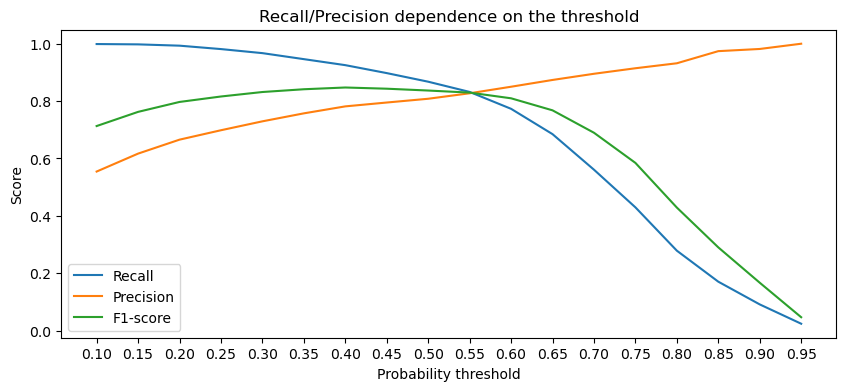

In [183]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [184]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.55
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1917
           1       0.83      0.83      0.83      1767

    accuracy                           0.84      3684
   macro avg       0.84      0.84      0.84      3684
weighted avg       0.84      0.84      0.84      3684



### KNN c 5 соседями

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 5)

# обучаем его по тренировочные выборке - просто забрал точки и запомнил их координаты
knn.fit(X_train_scaled, y_train)

# строим для тестовой выборки прогнозы - здесь уже начинает считать расстояния
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 

#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

### KNN c 7 соседями

In [186]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 7)

# обучаем его по тренировочные выборке - просто забрал точки и запомнил их координаты
knn.fit(X_train_scaled, y_train)

# строим для тестовой выборки прогнозы - здесь уже начинает считать расстояния
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 

#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1917
           1       0.78      0.63      0.70      1767

    accuracy                           0.74      3684
   macro avg       0.74      0.73      0.73      3684
weighted avg       0.74      0.74      0.73      3684



### KNN c 9 соседями

In [187]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 9)

# обучаем его по тренировочные выборке - просто забрал точки и запомнил их координаты
knn.fit(X_train_scaled, y_train)

# строим для тестовой выборки прогнозы - здесь уже начинает считать расстояния
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 

#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1917
           1       0.78      0.63      0.70      1767

    accuracy                           0.74      3684
   macro avg       0.74      0.73      0.73      3684
weighted avg       0.74      0.74      0.73      3684



KNN с 5, 7, 9 соседями получились примерно одинаковые по качеству. KNN с 9 соседями совсем немного (на 0.01) лучше KNN с 7 соседями по метрике accuracy. KNN с 5 соседями оказался совсем немного хуже, чем KNN с 7 и с 9 соседями (значения метрик меньше на 0.01).  

Метрики модели случайного леса и модели логистической регрессии немного отличаются, модель случайного леса немного лучше модели логистической регрессии почти по всем метрикам. Практически все метрики модели KNN хуже, чем метрики модели случайного леса.   

__Accuracy__ модели случайного леса равно 0.84 и больше accuracy других моделей: на 0.02 больше accuracy логистической регрессии и на 0.1 accuracy KNN.  

__Precision__ модели случайного леса также выше precision других моделей и равно 0.83 для класса 1 и 0.84 для класса 0. Precision этой модели отличается на 0.02 от precision логистической регрессии и на 0.05-0.13 от precision KNN. Хорошее значение метрики precision означает, что клиенты, предсказанные моделью как согласившиеся открыть депозит, действительно склонны к этому (метрика precision показывает долю правильно предсказанных положительных классов относительно всех класифицированных как положительные).  

__Recall__ модели случайного леса равно 0.83 для класса 1 и 0.84 для класса 0. Recall этой модели немного отличается от recall логистической регрессии (в лучшую сторону для класса 1 и в худшую – для класса 2) и на 0.2 от recall KNN. Хорошее значение метрики recall означает, что модель смогла уловить как можно больше потенциальных клиентов, склонных открыть депозит (recall показывает долю правильно предсказанных положительных классов относительно всех истинных положительных классов).  

__F1-score__ модели случайного леса выше f1-score других моделей и равно 0.83 для класса 1 и 0.84 для класса 0. F1-score этой модели отличается на 0.02 от f1-score логистической регрессии и на 0.07 - 0.13 от f1-score KNN. F1-score важен в данном случае, так как учитывает и precision, и recall, позволяет посмотреть на баланс между этими метриками.  
  
Таким образом, __налучшая модель в данном случае - модель случайного леса.__

## Задание 10 (1.5 балла)

Обучите градиентный бустинг, подобрав параметры с помощью перебора по сетке. Улучшилось ли качество?

In [188]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

model_for_gs = GradientBoostingClassifier()
params = {"n_estimators": 2**np.arange(8), "learning_rate": 0.1**np.arange(3)}
gs = GridSearchCV(model_for_gs, 
                  params, 
                  cv=3, 
                  scoring=make_scorer(f1_score),
                  verbose=5)
gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.728 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.779 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.785 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.772 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.784 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.805 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.794 total time=   0.0s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.802 total time=   0.0s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.828 total time=   0.0s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.819 total time=   0.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.826 total time=   0.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1.  , 0.1 , 0.01]),
                         'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128])},
             scoring=make_scorer(f1_score), verbose=5)

In [189]:
print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", gs.best_score_)

Лучшие гиперпараметры: {'learning_rate': 0.1, 'n_estimators': 128}
Лучшее значение метрики: 0.8447799391162244


Метрика f1-score равна примерно 0.845. Качество осталось примерно таким же

## Задание 11 (1.5 балла)

Реализуйте стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. Изменилось ли качество?

In [190]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=10, random_state=42)
)

stacking_clf.fit(X_train_scaled, y_train)

/Users/SSkobeleva/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/SSkobeleva/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=42))

In [191]:
from sklearn.metrics import f1_score

y_pred_stack = stacking_clf.predict(X_test_scaled)
print("f1-score:", round(f1_score(y_test, y_pred_stack),3)) 

f1-score: 0.82


Метрика f1-score равна примерно 0.82. Качество немного ухудшилось (примерно на 0.02 по сравнению с другими моделями)

## Задание 12 (1 балла)

Выведите три наиболее важных признака, основываясь на любой обученной модели (на ваш выбор)

Выведем три наиболее важных признака, основываясь на модели случайногот леса (по дереву решений  нельзя сказать во сколько раз один признак важнее другого (вклад какого коэффициента больше), но можно понять, какие признаки являются наиболее важными):

             Feature  Importance
3           duration    0.442342
49  poutcome_success    0.058134
0                age    0.043340


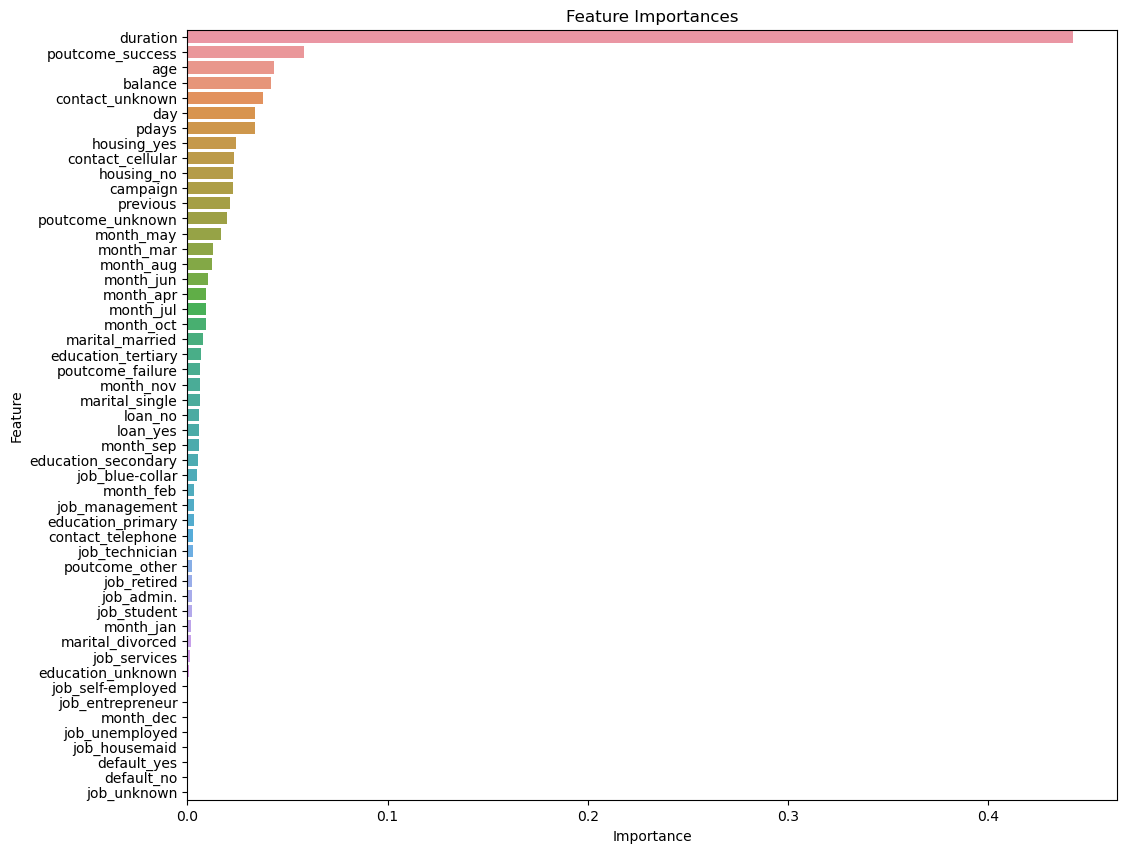

In [206]:
feature_importances = rf.feature_importances_  # rf - наша обученная модель 
feature_names = X_train.columns  # X_train содержит наши факторы

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False) # поставим значимость по убыванию

top3_features = importances_df.head(3)
print(top3_features)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

Тремя наиболее важными признаками в предсказании переменной `deposit` (согласится ли клиент открыть депозит в нашем банке) оказались признаки `duration` (длительность последнего контакта), `poutcome_success` (успешная прошлая маркетинговая кампания) и `age` (возраст клиента банка). Также важен признак `balance` (баланс клиента банка)